In [2]:
%pip install seaborn
%pip install plotly==5.14.1
%pip install ipykernel
%pip install nbformat==5.1.2
%pip install openpyxl
%pip show nbformat

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import geopandas as gpd
sns.set_style("whitegrid")
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing data
df = pd.read_csv('world-happiness-report-2021.csv')
df2 = pd.read_csv('world-happiness-report.csv')
pop = pd.read_csv('2021_population.csv')
hofstede = pd.read_excel('hofstede_full.xlsx')

safety = df.copy()

# renaming columns for easier interpretation and merge later
df = df.rename(columns={'Country name': 'Country'})
df2 = df2.rename(columns={'Country name': 'Country'})
pop = pop.rename(columns={'country': 'Country'})
pop = pop.rename(columns={'2021_last_updated': 'Population in 2021'})
pop = pop.rename(columns={'growth_rate': 'Growth rate'})
df = df.rename(columns={'Ladder score': 'Happiness score'})
df2 = df2.rename(columns={'Life Ladder': 'Happiness score'})

# editing pop column for merge later
pop['Population in 2021'] = pop['Population in 2021'].str.replace(',', '')
pop['Population in 2021'] = pop['Population in 2021'].astype(float)
pop['Growth rate'] = pop['Growth rate'].str.rstrip("%").astype(float)/100

# might use later 
temporal = df2.groupby(['year','Country'])['Happiness score'].mean().unstack().T
temporal = temporal.fillna(0).astype(int)


In [5]:
# cleaning columns
df = df.drop(columns=['Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis = 1)

# merging data
df = pd.merge(df, pop[['Country', 'Population in 2021', 'Growth rate']], on='Country', how='inner')
df = pd.merge(df, hofstede[['Country', 'Power distance', 'Individualism', 'Masculinity', 'Uncertainty avoidance', 'Long term orientation', 'Indulgence']], on='Country', how = 'left')



In [6]:
past_winners = df2.loc[df2.groupby("year")["Happiness score"].idxmax()]
past_bottom = df2.loc[df2.groupby("year")["Happiness score"].idxmin()]

hap = df.groupby('Country')['Happiness score'].mean().sort_values(ascending=False)[:10]
unhap = df.groupby('Country')['Happiness score'].mean().sort_values(ascending=True)[:10]
top_bottom = hap.append(unhap, ignore_index=False).sort_values(ascending=True)

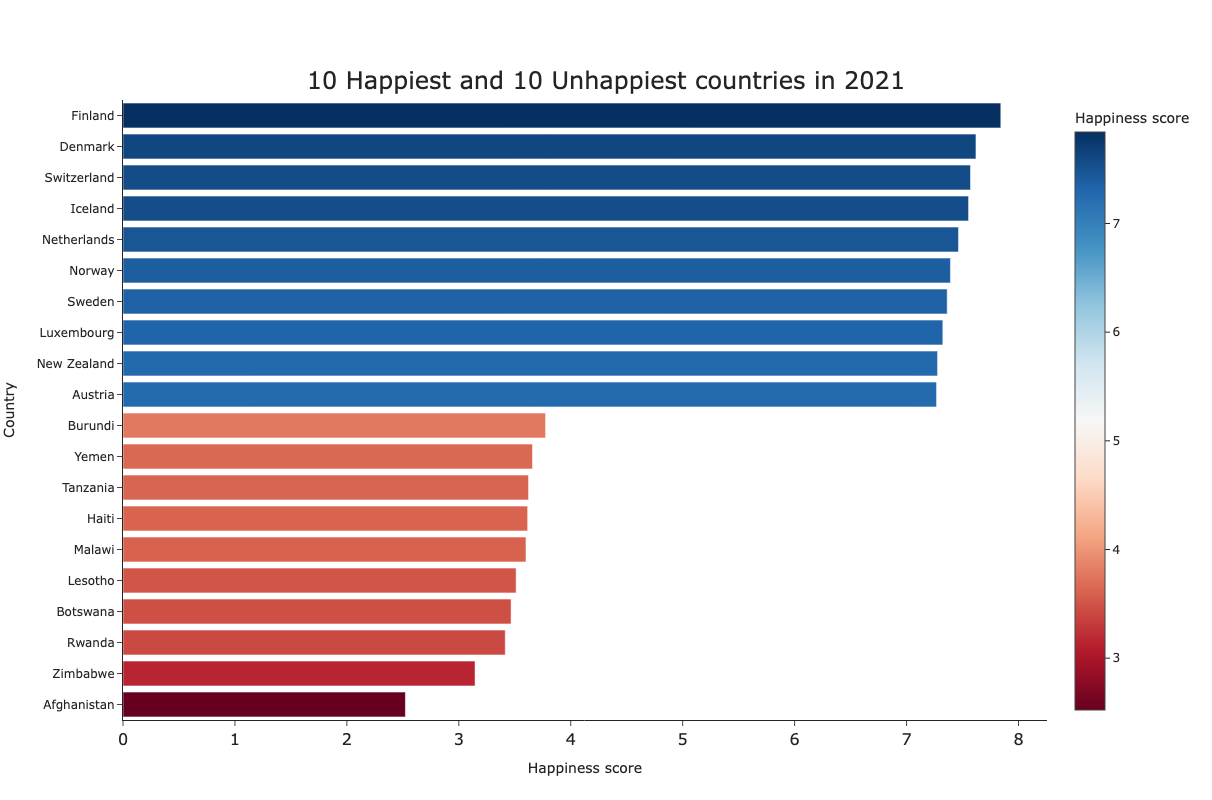

In [7]:
df_happiest_unhappiest = df[(df.loc[:,"Happiness score"] > 7.2) | (df.loc[:,"Happiness score"] < 3.8)]
df_happiest_unhappiest = df_happiest_unhappiest.sort_values(by='Happiness score', ascending=True)

fig7 = px.bar(df_happiest_unhappiest,
       x = "Happiness score", 
       y = "Country", 
       facet_row_spacing = 0.98,
       color="Happiness score",
       color_continuous_scale='RdBu',
       template = "simple_white",
       height = 800,
       title = "10 Happiest and 10 Unhappiest countries in 2021")
fig7.update_layout(title_x=0.5, title_y=0.91, title_font=dict(size=24))
fig7.update_xaxes(
    tickfont=dict(size=16))
fig7.show()

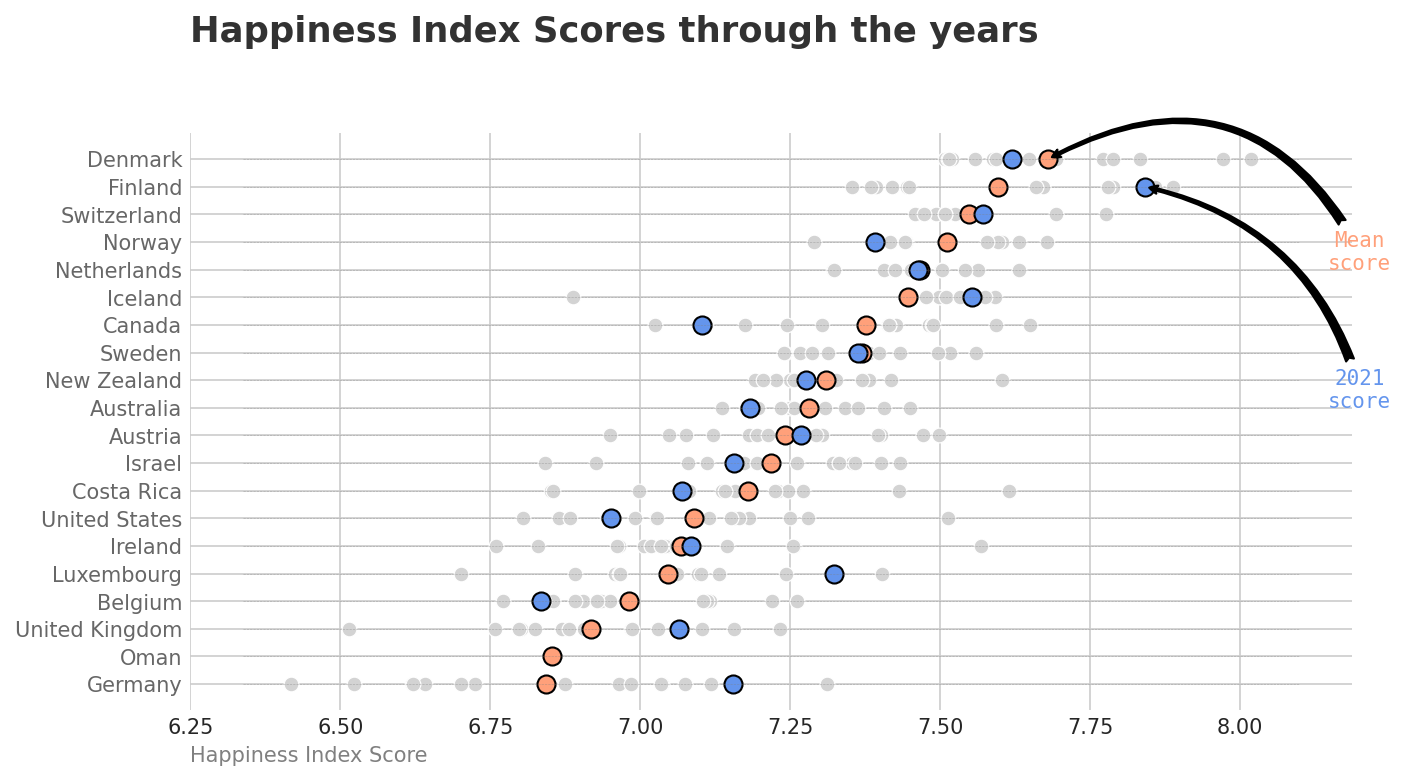

In [8]:
background = "#fbfbfb"
fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)


# Reduced list as too many to show all at once 
top_list_ = df2.groupby('Country')['Happiness score'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='Happiness score',ascending=True)


plot = 1
for country in top_list_['Country']:
    mean = df2[df2['Country'] == country].groupby('Country')['Happiness score'].mean()
    # historic scores
    sns.scatterplot(data=df2[df2['Country'] == country], y=plot, x='Happiness score',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df2[df2['Country'] == country], y=plot, x=mean,color='lightsalmon',ec='black',linewidth=1,s=75,ax=ax)
    #2021 score
    sns.scatterplot(data=df[df['Country'] == country], y=plot, x='Happiness score',color='cornflowerblue',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1


ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['Country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Happiness Index Score",loc='left',color='gray')


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.hlines(y=top_list_.index+1, xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
ax.text(6.25, Yend+3.3, 'Happiness Index Scores through the years', fontsize=17, fontweight='bold', color='#323232')

plt.annotate('2021\nscore', xy=(7.842, 19), xytext=(8.2, 11),
             arrowprops=dict(color="k",facecolor='black',arrowstyle="fancy",connectionstyle="arc3,rad=.3"), fontsize=10,fontfamily='monospace',ha='center', color='cornflowerblue')

plt.annotate('Mean\nscore', xy=(7.6804, 20), xytext=(8.2, 16),
             arrowprops=dict(color="k",facecolor='black',arrowstyle="fancy",connectionstyle="arc3,rad=.5"), fontsize=10,fontfamily='monospace',ha='center', color='lightsalmon')


plt.show()

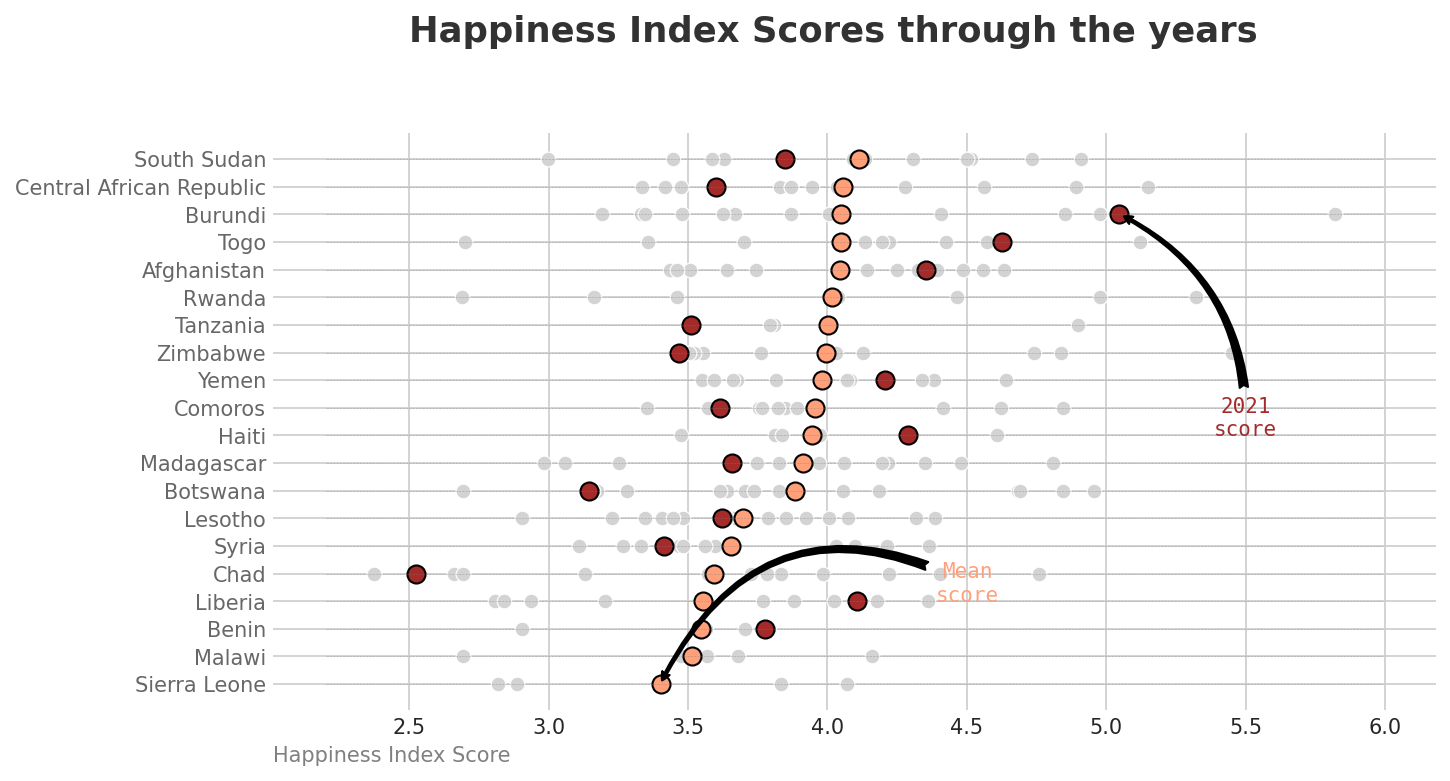

In [17]:
background = "#fbfbfb"
fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)


# Reduced list as too many to show all at once 
top_list_ = df2.groupby('Country')['Happiness score'].mean().sort_values(ascending=True).reset_index()[:20].sort_values(by='Happiness score',ascending=True)


plot = 1
for country in top_list_['Country']:
    mean = df2[df2['Country'] == country].groupby('Country')['Happiness score'].mean()
    # historic scores
    sns.scatterplot(data=df2[df2['Country'] == country], y=plot, x='Happiness score',color='lightgray',s=50,ax=ax)
    # mean score
    sns.scatterplot(data=df2[df2['Country'] == country], y=plot, x=mean,color='lightsalmon',ec='black',linewidth=1,s=75,ax=ax)
    #2021 score
    sns.scatterplot(data=df[df['Country'] == country], y=plot, x='Happiness score',color='brown',ec='black',linewidth=1,s=75,ax=ax)   
    plot += 1


ax.set_yticks(top_list_.index+1)
ax.set_yticklabels(top_list_['Country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel("Happiness Index Score",loc='left',color='gray')


for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
    
Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.hlines(y=top_list_.index+1, xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='--')
ax.set_axisbelow(True)
ax.text(2.5, Yend+3.3, 'Happiness Index Scores through the years', fontsize=17, fontweight='bold', color='#323232')

plt.annotate('2021\nscore', xy=(5.05, 18), xytext=(5.5, 10),
             arrowprops=dict(color="k",facecolor='black',arrowstyle="fancy",connectionstyle="arc3,rad=.3"), fontsize=10,fontfamily='monospace',ha='center', color='brown')

plt.annotate('Mean\nscore', xy=(3.4, 1), xytext=(4.5, 4),
             arrowprops=dict(color="k",facecolor='black',arrowstyle="fancy",connectionstyle="arc3,rad=.5"), fontsize=10,fontfamily='monospace',ha='center', color='lightsalmon')


plt.show()

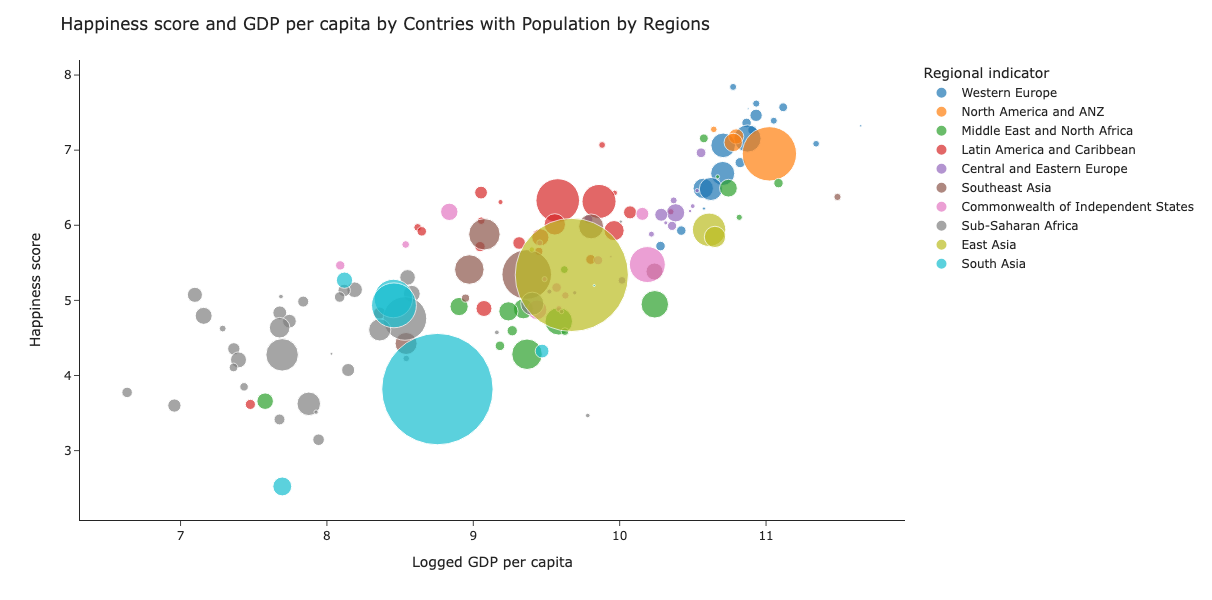

In [9]:
fig2 = px.scatter(df,
                x = "Logged GDP per capita",
                y = "Happiness score",
                size = "Population in 2021",
                template = "simple_white",
                hover_name = "Country",
                color = "Regional indicator", 
                height=600,
                size_max = 80)
fig2.update_layout(title = "Happiness score and GDP per capita by Contries with Population by Regions")
fig2.show()

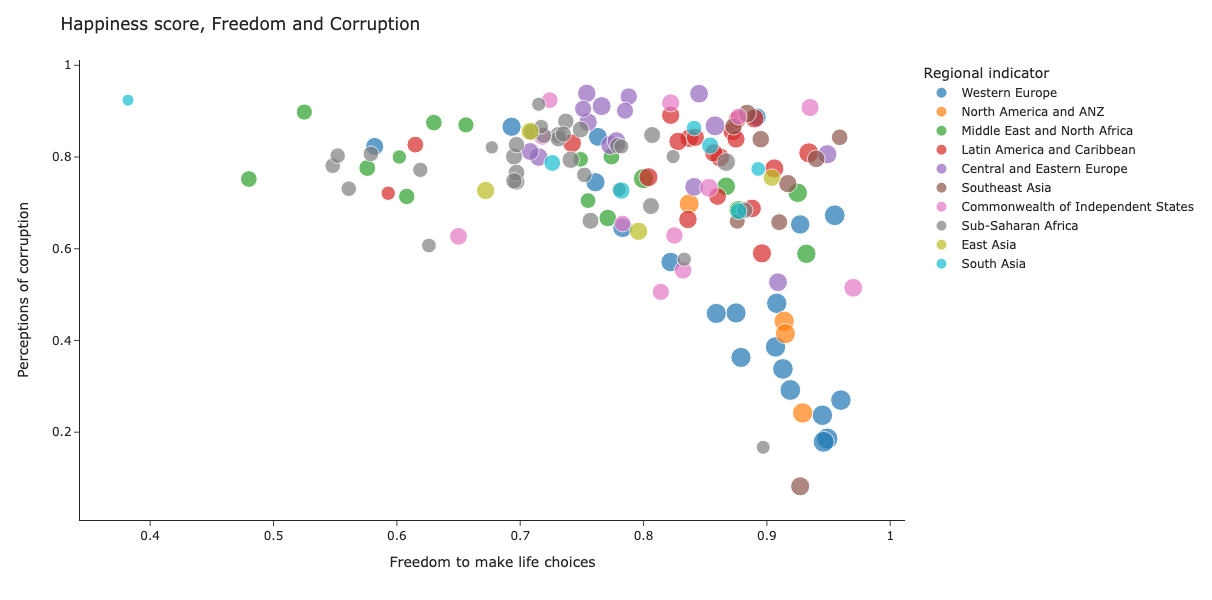

In [10]:
fig3 = px.scatter(df,
                x = "Freedom to make life choices",
                y = "Perceptions of corruption",
                size = "Happiness score",
                template = "simple_white",
                hover_name = "Country",
                color = "Regional indicator", 
                height=600,
                size_max = 15)
fig3.update_layout(title = "Happiness score, Freedom and Corruption")
fig3.show()

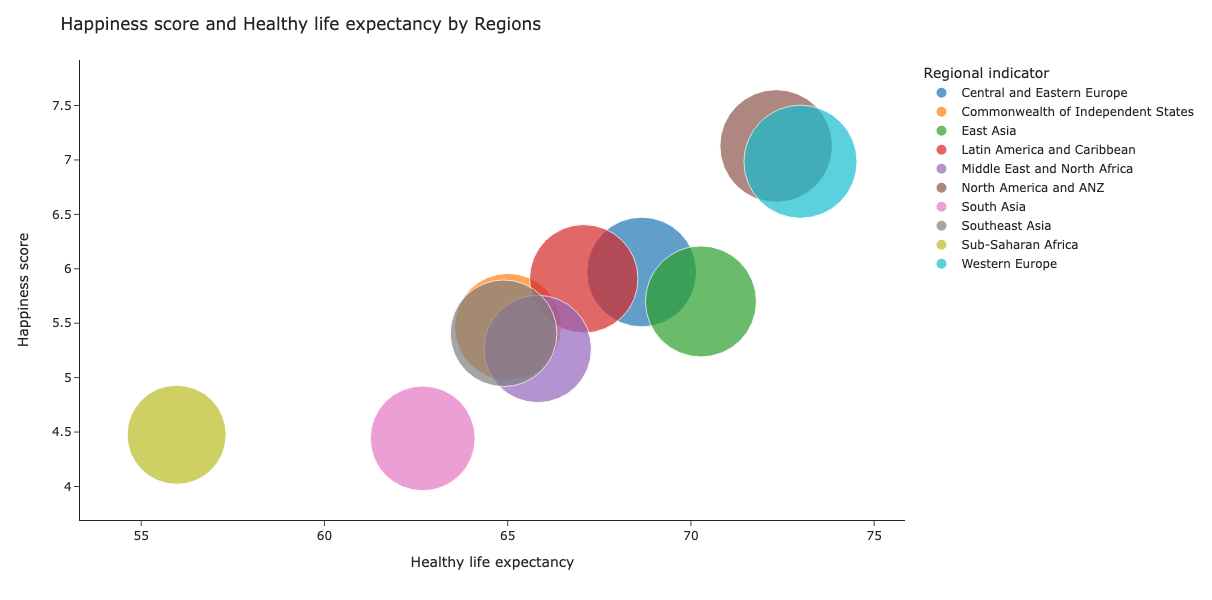

In [11]:
continent_score = df.groupby('Regional indicator')['Healthy life expectancy','Logged GDP per capita','Perceptions of corruption','Freedom to make life choices','Happiness score'].mean().reset_index()

fig4 = px.scatter(continent_score,
                x = continent_score['Healthy life expectancy'],
                y = continent_score['Happiness score'],
                size = continent_score['Healthy life expectancy'],
                template = "simple_white",
                hover_name = continent_score['Regional indicator'],
                color = continent_score['Regional indicator'], 
                height=600,
                size_max = 80)
fig4.update_layout(title = "Happiness score and Healthy life expectancy by Regions")
fig4.show()



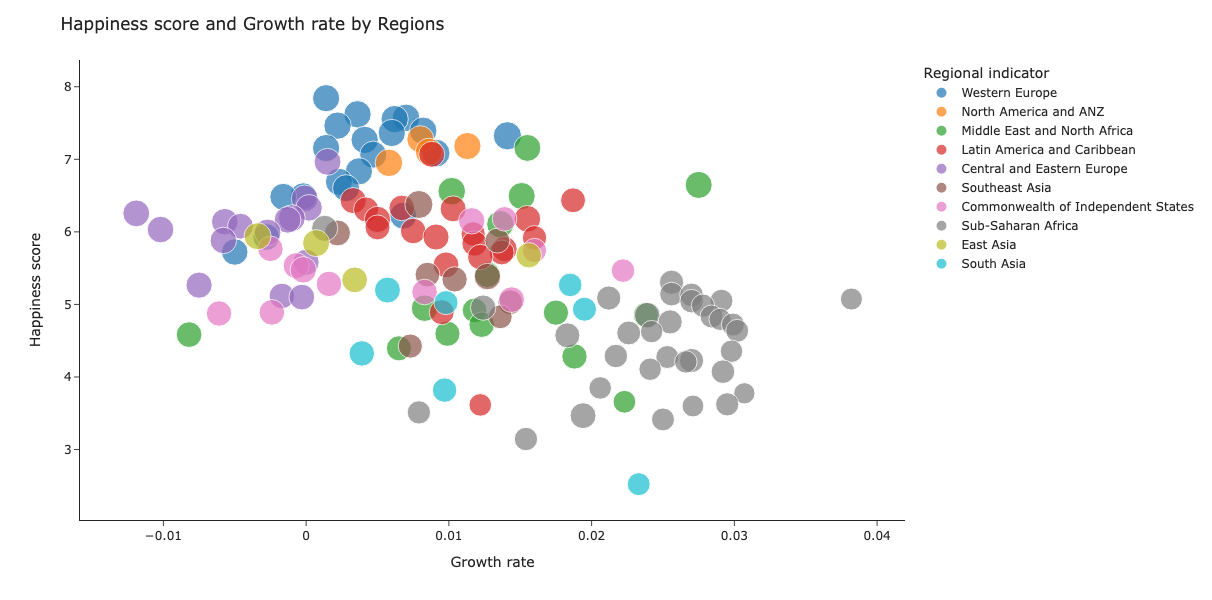

In [12]:
fig5 = px.scatter(df,
                x = "Growth rate",
                y = "Happiness score",
                size = "Logged GDP per capita",
                template = "simple_white",
                hover_name = "Country",
                color = "Regional indicator", 
                height=600,
                size_max = 20)
fig5.update_layout(title = "Happiness score and Growth rate by Regions")
fig5.show()

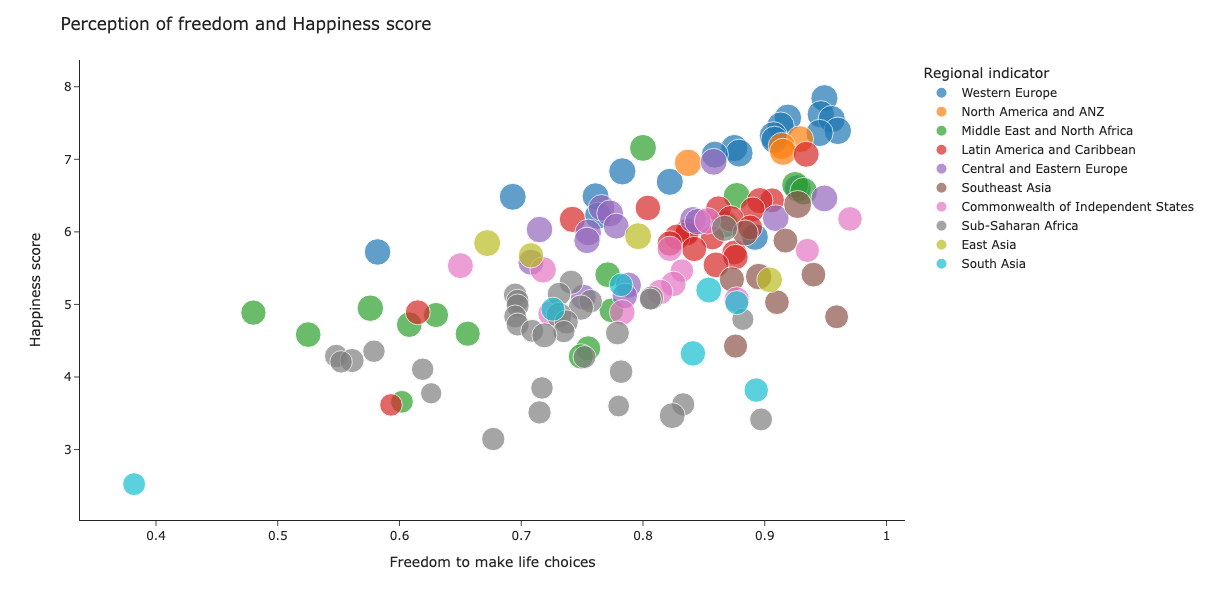

In [13]:
fig8 = px.scatter(df,
                x = "Freedom to make life choices",
                y = "Happiness score",
                size = "Logged GDP per capita",
                template = "simple_white",
                hover_name = "Country",
                color = "Regional indicator", 
                height=600,
                size_max = 20)
fig8.update_layout(title = "Perception of freedom and Happiness score")
fig8.show()

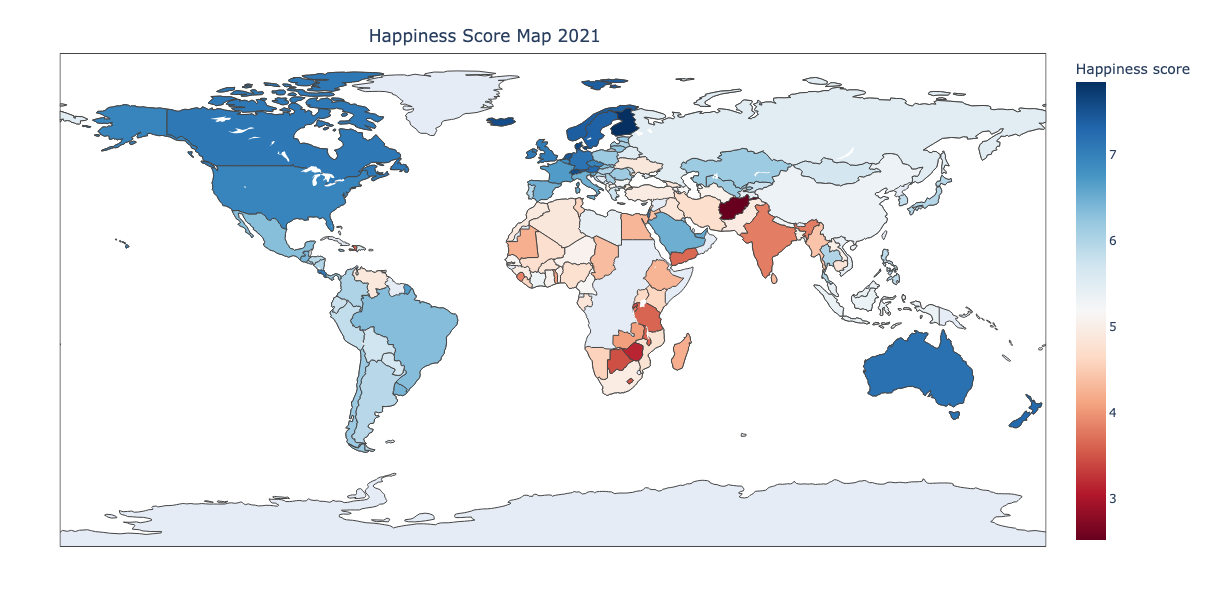

In [14]:
fig6 = px.choropleth(data_frame=df,
                    locations="Country",
                    locationmode="country names",
                    color="Happiness score",
                    color_continuous_scale='RdBu',
                    title="Happiness Score Map 2021")
fig6.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig6.update_layout(
    autosize=False,
    width=1200,
    height=600,
    title={
        'y':0.95,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig6.show()

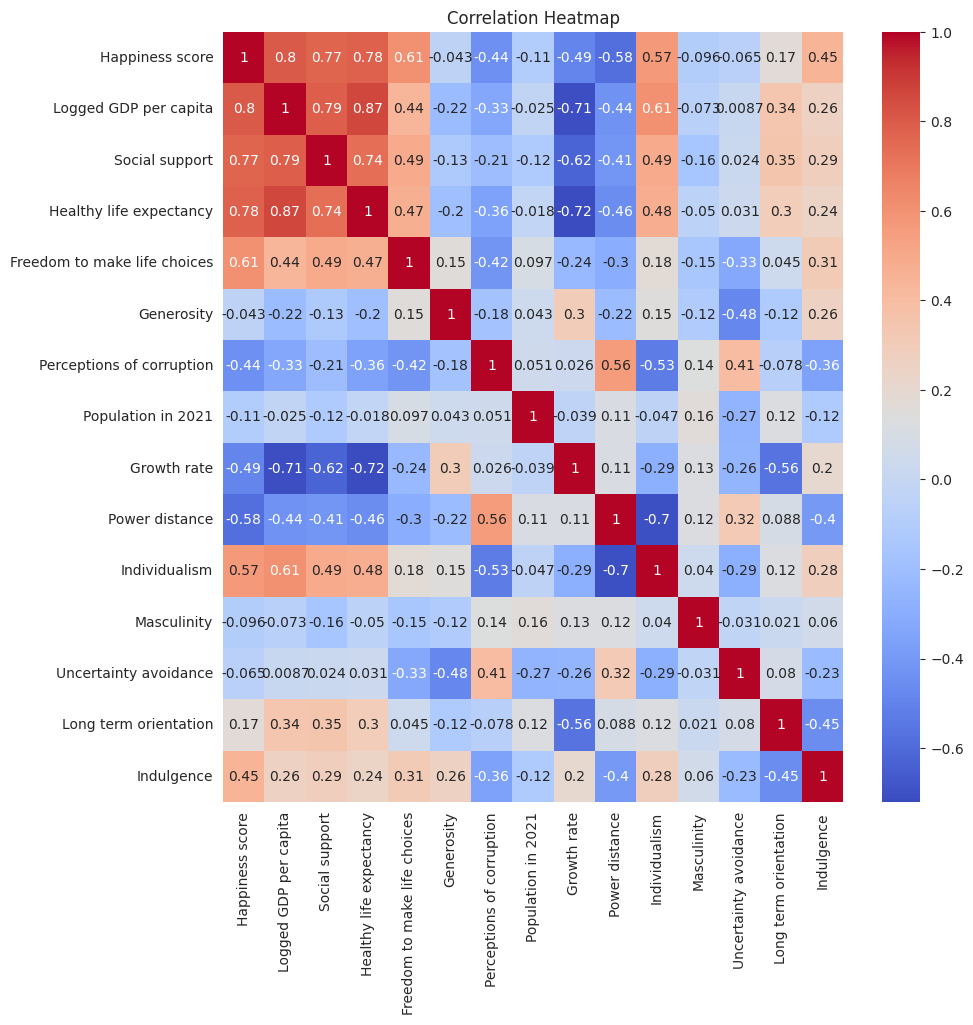

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
df_target = df['Happiness score']

#remove the column Country and Happiness score
df_x = df.drop(['Country', 'Happiness score'], axis = 1)

In [44]:
#get dummies
df_x = pd.get_dummies(df_x, columns=['Regional indicator'])

df_x.head()

Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Population in 2021  Growth rate  Power distance  Individualism  ...  \
0           5553102.0       0.0014            33.0           63.0  ...   
1           5825798.0       0.0036            18.0           74.0  ...   
2           8752564.0       0.0070            34.0           68.0  ...   
3            344646.0       0.0062            30.0           60.0  ...   
4          17195298.0       0.0022            38.0           80.0  ...   

   Regional indicator_Central and Eastern Europe  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Regional indicator_Commonwealth of Independent States  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Regional indicator_East Asia  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   Regional indicator_Latin America and Caribbean  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Regional indicator_Middle East and North Africa  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Regional indicator_North America and ANZ  Regional indicator_South Asia  \
0                                         0                              0   
1                                         0                              0   
2                                         0                              0   
3                                         0                              0   
4                                         0                              0   

   Regional indicator_Southeast Asia  Regional indicator_Sub-Saharan Africa  \
0                                  0                                      0   
1                                  0                                      0   
2                                  0                                      0   
3                                  0                                      0   
4                                  0                                      0   

   Regional indicator_Western Europe  
0                                  1  
1                                  1  
2                                  1  
3                                  1  
4                             

In [52]:
#normalize data to avoid biased 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x = pd.DataFrame(scaler.fit_transform(df_x), columns = df_x.columns)

df_x.head()

Logged GDP per capita  Social support  Healthy life expectancy  \
0               0.780297        0.931442                 0.815538   
1               0.820106        0.931442                 0.841607   
2               0.866465        0.903073                 0.904920   
3               0.806248        1.000000                 0.852780   
4               0.819854        0.903073                 0.830435   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.977083    0.228916                   0.121354   
1                      0.970833    0.383133                   0.113186   
2                      0.914583    0.377108                   0.245041   
3                      0.989583    0.539759                   0.689615   
4                      0.902083    0.557831                   0.298716   

   Population in 2021  Growth rate  Power distance  Individualism  ...  \
0            0.003600     0.321256        0.236559       0.654321  ...   
1            0.003789     0.374396        0.075269       0.790123  ...   
2            0.005812     0.456522        0.247312       0.716049  ...   
3            0.000000     0.437198        0.204301       0.617284  ...   
4            0.011647     0.340580        0.290323       0.864198  ...   

   Regional indicator_Central and Eastern Europe  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Regional indicator_Commonwealth of Independent States  \
0                                                0.0       
1                                                0.0       
2                                                0.0       
3                                                0.0       
4                                                0.0       

   Regional indicator_East Asia  \
0                           0.0   
1                           0.0   
2                           0.0   
3                           0.0   
4                           0.0   

   Regional indicator_Latin America and Caribbean  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Regional indicator_Middle East and North Africa  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Regional indicator_North America and ANZ  Regional indicator_South Asia  \
0                                       0.0                            0.0   
1                                       0.0                            0.0   
2                                       0.0                            0.0   
3                                       0.0                            0.0   
4                                       0.0                            0.0   

   Regional indicator_Southeast Asia  Regional indicator_Sub-Saharan Africa  \
0                                0.0                                    0.0   
1                                0.0                                    0.0   
2                                0.0                                    0.0   
3                                0.0                                    0.0   
4                                0.0                                    0.0   

   Regional indicator_Western Europe  
0                                1.0  
1                                1.0  
2                                1.0  
3                                1.0  
4                             

In [19]:
# Defining KNN imputer with neighbors

#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=2)
#df_x = pd.DataFrame(imputer.fit_transform(df_x),columns = df_x.columns)

#df_x.isna().any()


In [28]:
# Group by the regional indicator and calculate the mean of each column
mean_values = df_x.groupby('Regional indicator').transform('mean')

# Fill the null values with the respective mean values
df_x = df_x.fillna(mean_values)

df_x.isna().any()


Regional indicator              False
Logged GDP per capita           False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
Population in 2021              False
Growth rate                     False
Power distance                  False
Individualism                   False
Masculinity                     False
Uncertainty avoidance           False
Long term orientation           False
Indulgence                      False
dtype: bool

In [46]:
df_x = df_x.dropna()

df_x.isna().any()


Logged GDP per capita                                    False
Social support                                           False
Healthy life expectancy                                  False
Freedom to make life choices                             False
Generosity                                               False
Perceptions of corruption                                False
Population in 2021                                       False
Growth rate                                              False
Power distance                                           False
Individualism                                            False
Masculinity                                              False
Uncertainty avoidance                                    False
Long term orientation                                    False
Indulgence                                               False
Regional indicator_Central and Eastern Europe            False
Regional indicator_Commonwealth of Independent States  

In [53]:
from sklearn.decomposition import PCA

pca = PCA()

Coord = pca.fit_transform(df_x)

The eigenvalues are:  [3.88926175e-01 2.47800499e-01 1.51686573e-01 1.38760038e-01
 1.23483702e-01 9.85559817e-02 8.82987018e-02 6.61424573e-02
 4.78502070e-02 3.80566357e-02 2.69973645e-02 2.48846047e-02
 2.07005633e-02 1.89451141e-02 1.54193551e-02 1.34679206e-02
 1.14048232e-02 9.43875359e-03 6.28872713e-03 5.20989711e-03
 4.40182031e-03 3.99575403e-03 2.15806680e-03 8.70557403e-33]


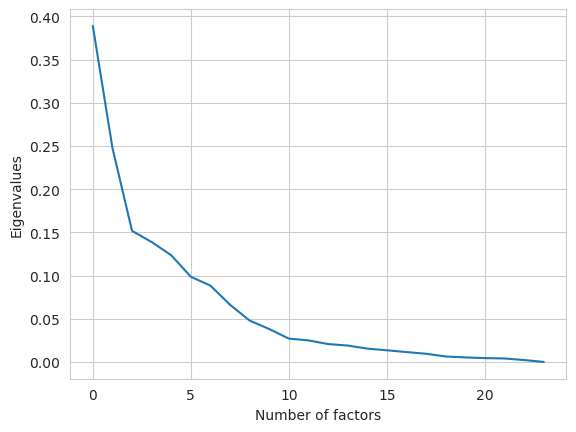

In [54]:
print("The eigenvalues are: ",pca.explained_variance_)

plt.plot(range(0,24), pca.explained_variance_)
plt.xlabel('Number of factors')
plt.ylabel('Eigenvalues')
plt.show()

Ratios:  [2.50455762e-01 1.59575433e-01 9.76812018e-02 8.93569354e-02
 7.95194739e-02 6.34668354e-02 5.68614819e-02 4.25935837e-02
 3.08139715e-02 2.45072312e-02 1.73854216e-02 1.60248732e-02
 1.33304871e-02 1.22000351e-02 9.92956139e-03 8.67290129e-03
 7.34433389e-03 6.07824924e-03 4.04973501e-03 3.35500369e-03
 2.83462861e-03 2.57313517e-03 1.38972458e-03 5.60610553e-33]


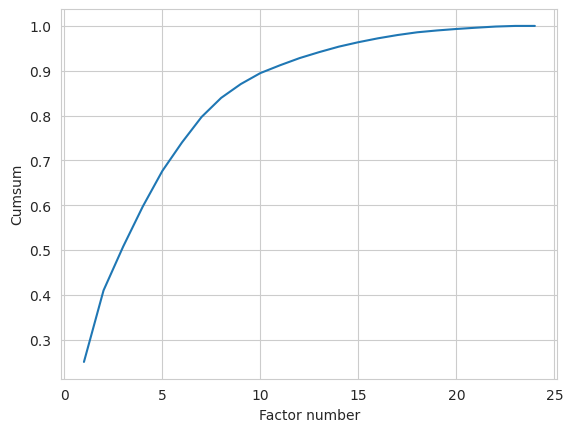

In [55]:
print("Ratios: ",pca.explained_variance_ratio_)

plt.plot(np.arange(1, 25), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Factor number')
plt.ylabel('Cumsum')
plt.show()

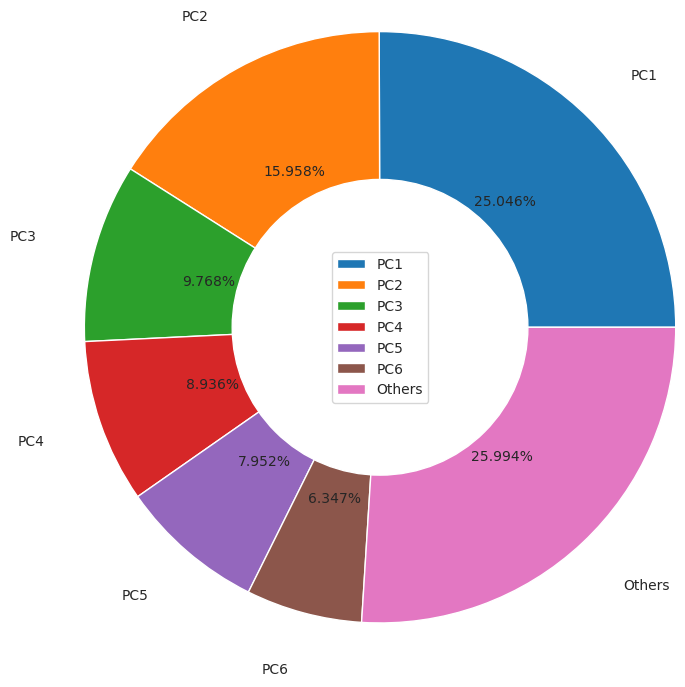

In [56]:
# Pie chart of the distribution of the share of variance explained by each axis.
L1 = list(pca.explained_variance_ratio_[0:6])
L1.append(sum(pca.explained_variance_ratio_[6:24]))

plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                    'Others'], autopct='%1.3f%%', radius=2, labeldistance=1.2)

plt.legend(loc = 'center')
my_circle=plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

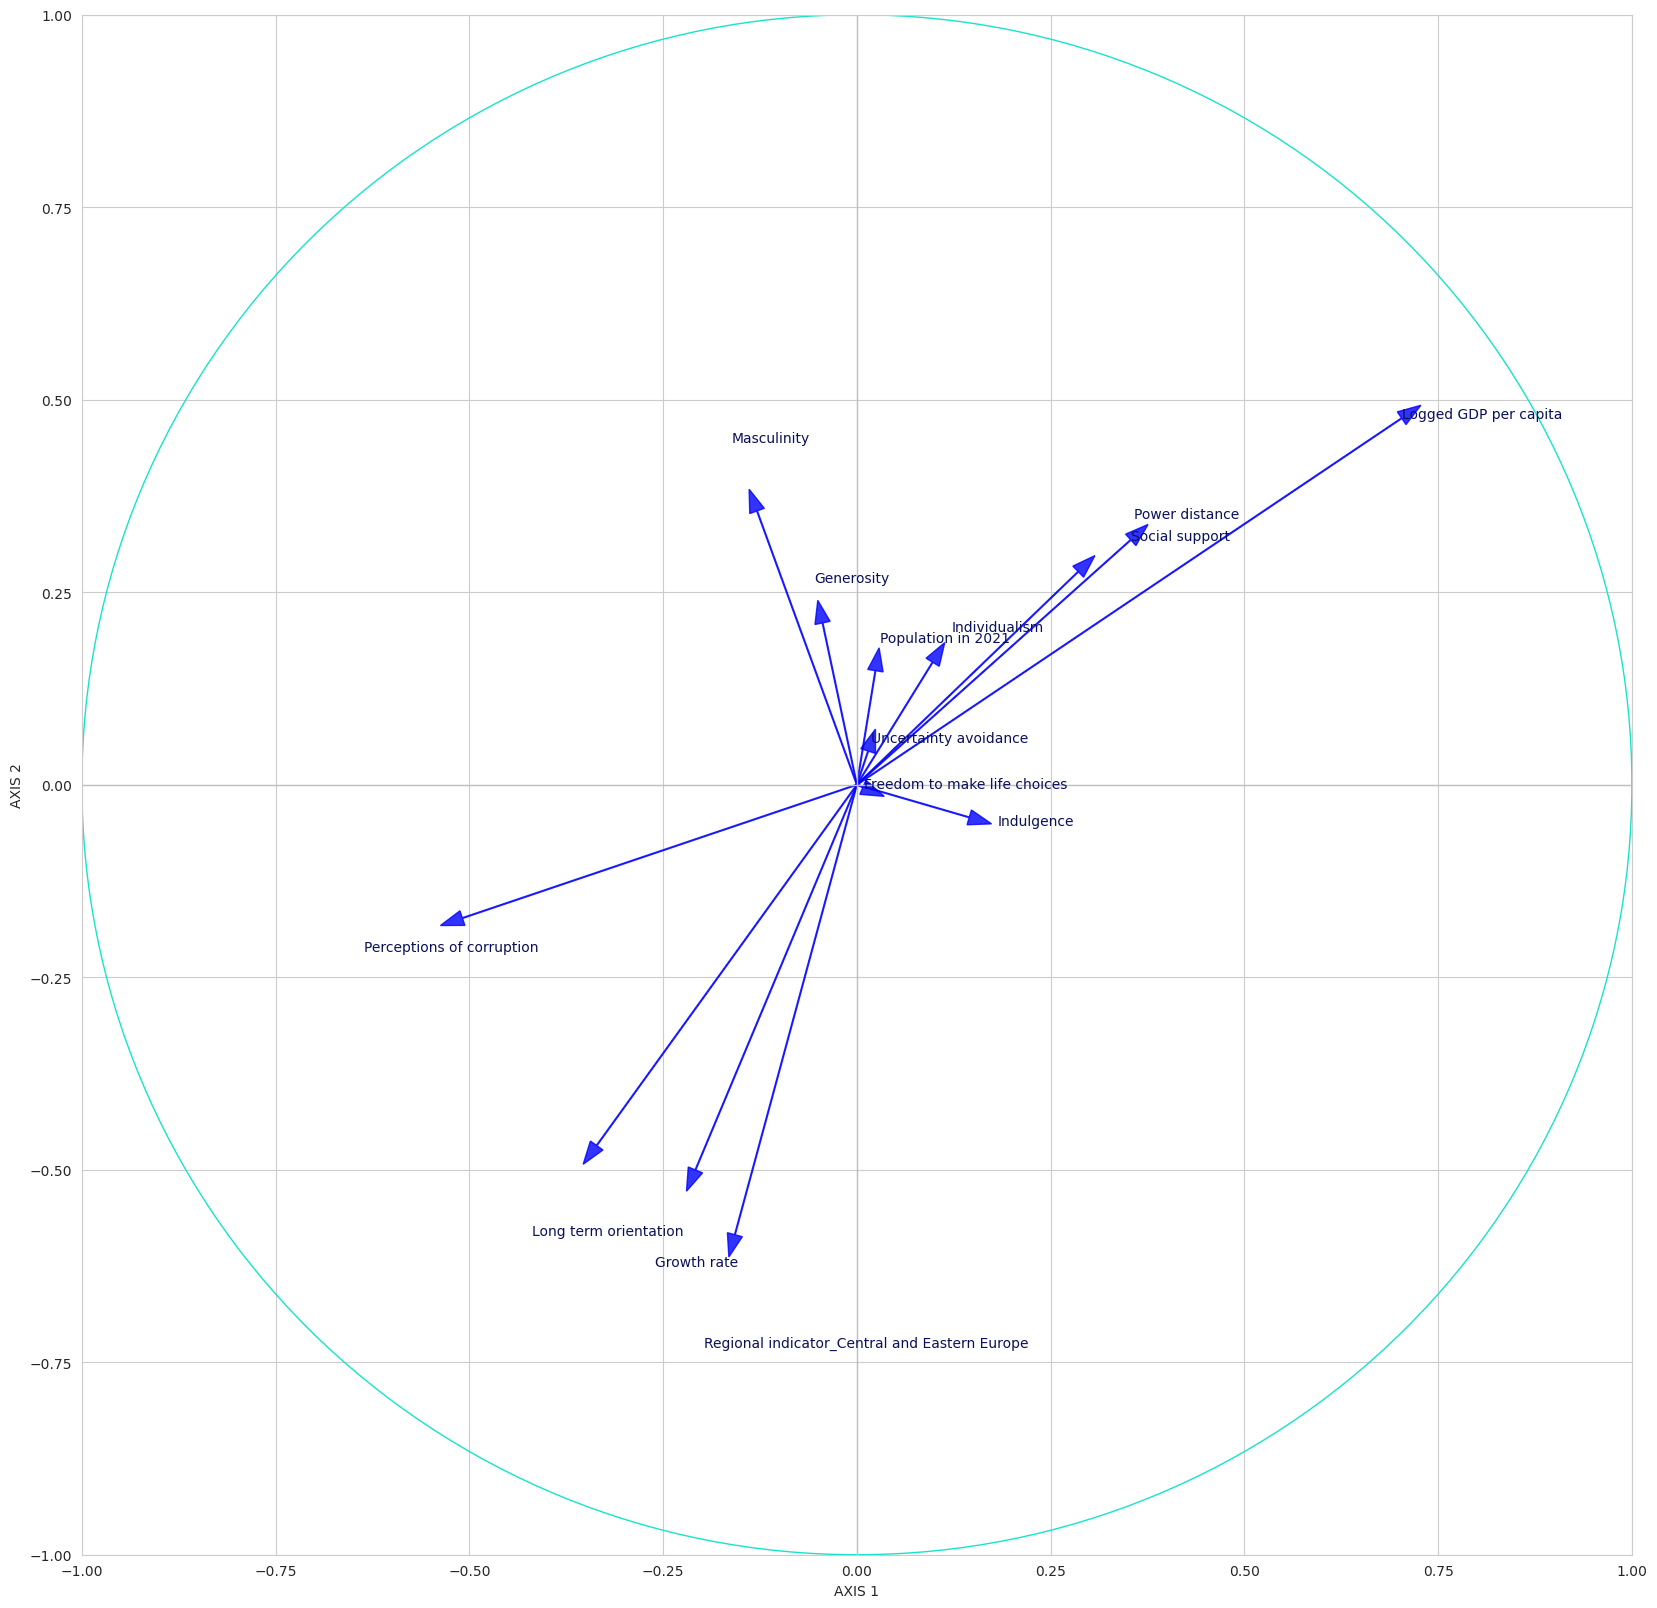

In [57]:
racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((24, 24))
for k in range(15):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Delimitation 
fig, axes = plt.subplots(figsize=(20, 20))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Displaying variables
for j in range(3,15):
    plt.annotate(df_x.columns[j], (corvar[j, 0]*5, corvar[j, 1]*5), color='#091158', fontsize=10)
    plt.arrow(0, 0, corvar[j, 0]*4, corvar[j, 1]*4,
              alpha=0.8, head_width=0.02, color='b')
    
for j in range(2):
    plt.annotate(df_x.columns[j], (corvar[j, 0]*4, corvar[j, 1]*4), color='#091158', fontsize=10)
    plt.arrow(0, 0, corvar[j, 0]*4, corvar[j, 1]*4,
              alpha=0.8, head_width=0.02, color='b')

# Adding Axis
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Circle and labels
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXIS 1')
plt.ylabel('AXIS 2')
plt.show()